In [44]:
import requests
import json
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def get_subpages():
    subpage_links = []
    base_url = "https://www.usforacle.com/page/"

    current_date = datetime.now().date()
    start_date = datetime(2009, 1, 1).date()
    days_passed = (current_date - start_date).days
    last_subpage = 1497 + days_passed // 3  # Adjust the last subpage based on the number of days passed

    for page_number in range(1, last_subpage + 1):
        subpage_url = f"{base_url}{page_number}/"
        subpage_links.append(subpage_url)

    return subpage_links

def scrape_article_urls(subpage_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36',
    }

    response = requests.get(subpage_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='post-content')
    article_info = {}
    for article in articles:
        link = article.find('h2', class_='entry-title').find('a')['href']
        date_str = article.find('time', class_='entry-date').get_text()
        date = datetime.strptime(date_str, '%B %d, %Y').date().strftime('%Y_%m_%d')
        
        # Exclude links with dates earlier than 2009-01-01
        if date >= '2009_01_01':
            article_info[link] = date

    return article_info

def get_article_links_and_dates():
    counter = 1
    subpage_links = get_subpages()

    article_data = {}  # Dictionary to store article links and dates

    # Iterate through the subpage links
    for subpage_link in subpage_links:
        article_info = scrape_article_urls(subpage_link)

        # Add the article links and dates to the article_data dictionary
        for link, date in article_info.items():
            if date in article_data:
                article_data[date].append(link)
            else:
                article_data[date] = [link]
            print("Link added: ")
            print(counter)
            print()
            counter += 1
            
    # Save article data to a JSON file
    with open('usf_article_pages.json', 'w') as file:
        json.dump(article_data, file, indent=4)

    return article_data

In [45]:
# Call the function
scraped_data = get_article_links_and_dates()

Link added: 
1

Link added: 
2

Link added: 
3

Link added: 
4

Link added: 
5

Link added: 
6

Link added: 
7

Link added: 
8

Link added: 
9

Link added: 
10

Link added: 
11

Link added: 
12

Link added: 
13

Link added: 
14

Link added: 
15

Link added: 
16

Link added: 
17

Link added: 
18

Link added: 
19

Link added: 
20

Link added: 
21

Link added: 
22

Link added: 
23

Link added: 
24

Link added: 
25

Link added: 
26

Link added: 
27

Link added: 
28

Link added: 
29

Link added: 
30

Link added: 
31

Link added: 
32

Link added: 
33

Link added: 
34

Link added: 
35

Link added: 
36

Link added: 
37

Link added: 
38

Link added: 
39

Link added: 
40

Link added: 
41

Link added: 
42

Link added: 
43

Link added: 
44

Link added: 
45

Link added: 
46

Link added: 
47

Link added: 
48

Link added: 
49

Link added: 
50

Link added: 
51

Link added: 
52

Link added: 
53

Link added: 
54

Link added: 
55

Link added: 
56

Link added: 
57

Link added: 
58

Link added: 
59

Link a

In [60]:
import os
from bs4 import BeautifulSoup
import requests
import json

def get_article_text(url, file_path):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check for HTTP errors

        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")

        # Find the article body element using alternative tags and classes
        article_body = soup.find('div', class_='entry-content') or soup.find('div', class_='article-body') or soup.find('article')

        # Check if the article body exists
        if article_body is None:
            raise AttributeError("Article body not found.")

        # Extract the text from the article body
        text = article_body.get_text(separator='\n').strip()

        # Remove extra empty lines between sentences in the same paragraph
        text_lines = [line.strip() for line in text.split('\n')]
        text = '\n'.join(text_lines)

        # Save the text to the file
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(text)

        return text
    except (requests.exceptions.RequestException, AttributeError, Exception) as e:
        print(f"Error occurred while scraping article: {url}")
        print(e)
        return ""  # Return an empty string if an error occurs
    
# Load article data from JSON file
with open('usf_article_pages.json', 'r') as file:
    article_data = json.load(file)

school_name = "USF"
dates = sorted(article_data.keys())

for date in reversed(dates):
    articles = article_data[date]
    print(f"Publication Date: {date}")

    for article in articles:
        file_path = f"journal_data/txt/{school_name.replace(' ', '_')}/{date}.txt"
        if(os.path.exists(file_path)):
            print(f"Date {date} already added.")
        else:
            print(f"Date {date} added.")
            article_text = get_article_text(article, file_path)

Publication Date: 2023_06_08
Date 2023_06_08 already added.
Publication Date: 2023_06_06
Date 2023_06_06 already added.
Date 2023_06_06 already added.
Date 2023_06_06 already added.
Date 2023_06_06 already added.
Date 2023_06_06 already added.
Publication Date: 2023_06_02
Date 2023_06_02 already added.
Date 2023_06_02 already added.
Publication Date: 2023_06_01
Date 2023_06_01 already added.
Date 2023_06_01 already added.
Date 2023_06_01 already added.
Publication Date: 2023_05_31
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Date 2023_05_31 already added.
Publication Date: 2023_05_29
Date 2023_05_29 already added.
Publication Date: 2023_05_25
Date 2023_05_25 already added.
Publication Date: 2023_05_24
Date 2023_05_24 already added.
Date 2023_05_24 already added.
Date 2023_05_24 already added.
Date 2023_05_24 already added.
Date 2023_05_24 already 

grouped_data/csv/USF_Israel.csv created.
grouped_data/pkl/monthly/USF_Israel.pkl being created.


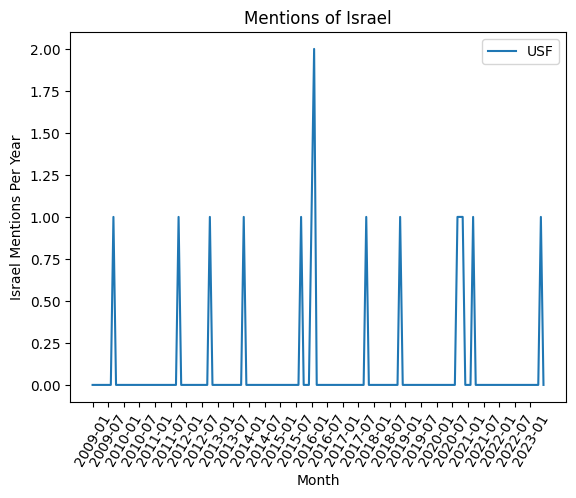

In [63]:
# Hyperparameters to Modify
school_name = 'USF'
string = "Israel"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")